<div style="color:#3c4d5a; border-top: 7px solid #42A5F5; border-bottom: 7px solid #42A5F5; padding: 5px; text-align: center; text-transform: uppercase"><h1>Transformación de variables categóricas, clasificación con K Nearest Neighbor (KNN), optimización y visualización de resultados - préstamos en instituciones bancarias</h1> </div>

Desarrollado por: Ing. Remigio Hurtado Ortiz, PhD. Correo de contacto: remigiohurtado@gmail.com

En esta práctica aprenderás a realizar mediante un pipeline: transformación de variables categóricas y transformaciones numéricas. Utilizarás la clase columntransformer. Posteriormente, se realizará una clasificación mediante KNN para predecir si un cliente de un banco es un cliente adecuado (bueno-bajo riesgo) o un cliente no adecuado (malo-alto riesgo) para otorgarle un crédito. 

Para ello, seguirás un proceso de análisis de datos en fases: 
- **Fase 1:** preparación de datos 
- **Fase 2:** clasificación con KNN, evaluación y optimización
- **Fase 3:** predicción de nuevos samples (nuevos clientes) 

Se diseñará el modelo mediante KNeighborsRegressor, puesto que en este ejemplo se presentará la predicción de la clase del cliente, y además se presentará la certeza (confianza o probabilidad) asociada a esa predicción. El modelo KNN con una salida continua nos proporcionará información valiosa para calcular esa certeza. Aprenderás varias formas adicionales de transformación numérica mediante la clase preprocessing: normalización, L1, L2, scaling, estandarización. 

Se ejecutará el modelo KNN con diferentes distancias (por ejemplo, euclidiana, manhattan, chebyshev y una personalizada) y diferentes valores de K (10, 20, 30, etc.) para evaluar y optimizar el rendimiento del modelo. Finalmente, se visualizará los resultados de los experimentos.

Requisitos: revisar previamente el <a href="https://genscinet.com/analisis-exploratorio/">análisis exploratorio del conjunto de datos del banco</a> - Statlog (German Credit Data) [1].

Esta guía de práctica está estructurada de la siguiente manera:

- [Fundamentos](#Fundamentos)

- [Fase 1: Preparación de datos](#preparacion-datos)

- [Fase 2: Clasificación con KNN, evaluación y optimización](#clasificacion-knn)

- [Fase 3: Predicción de nuevos samples (nuevos clientes)](#prediccion-nuevos-samples)

- [Conclusiones](#Conclusiones)

- [Referencias y enlaces](#Referencias-enlaces)

<div id="Fundamentos" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fundamentos: tipos de variables y transformación de variables categóricas y numéricas</h2> </div>

**1. Categóricas:** Las variables categóricas indican el tipo o categoría de una observación. Por lo tanto, las variables categóricas son variables cualitativas y en la mayoría de conjuntos de datos están representadas por un valor no numérico. 

**1.1 Nominales:** la categoría indica la identidad del objetivo. No hay un grado o diferencia entre las categorías, lo que se enfatiza es el nombre. Algunos ejemplos de variables categóricas nominales son: sexo, país, color de ojos, etc. La transformación habitual para estas variables es una transformación "Coding" o conversión a un código binario. Este proceso consiste en pasar las categorías en formato one_hot, que consiste en poner tantos ceros como categorías, y para representar un valor se coloca un uno en la posición del valor, ejemplo:

3 colores de ojos: azul, café, verde. 

azul = [1,0,0]
café = [0,1,0]
verde = [0,0,1]

En Python para ejecutar esta transformación se utiliza: OneHotEncoder

**1.2 Ordinales:** la categoría indica un orden. Algunos ejemplos de variables categóricas ordinales son: nivel de educación (primaria, secundaria, superior), las escalas de las encuestas de satisfacción (insatisfecho, neutro, satisfecho), calificación cualitativa (insuficiente, buena, muy buena, sobresaliente, muy sobresaliente), etc. La transformación para estas variables es más simple, las categorías en orden ascendente se transforman a un valor numérico empezando desde cero, ejemplo:

Satisfacción sobre un producto: no me gusta, neutro, me gusta

no me gusta: 0
neutro: 1
me gusta: 2

En Python para ejecutar esta transformación se utiliza: OrdinalEncoder. Con esta clase y sus funciones se transforma automáticamente las categorías a un valor numérico. En el dataset utilizado en este artículo las categorías siguen una nominación que permite una transformación directa al valor numérico. Ejemplo: A30, A31, A32, A33 y A34, estas categorías se transforman a los valores 0, 1, 2, 3, 4, de manera respectiva. También es posible especificar otros valores numéricos, para ello, se debe indicar la lista de categorías en orden, en conjunto con los valores correspondientes. Ejemplo: 
X = [['no me gusta', 1], ['neutro', 3], ['me gusta', 5]]. 

**2. Numéricas:** Las variables numéricas tienen valores que describen una cantidad medible. Las variables numéricas son variables cuantitativas.

**2.1 Continuas:** estas son variables que son cuantitativas y pueden medirse a lo largo de una secuencia o un rango de valores. Existen dos tipos de variables continuas: las variables de intervalo y las variables de relaciones. Las variables de intervalo pueden tener cualquier valor dentro de un rango de valores. Algunos ejemplos son temperatura o tiempo. Las variables de relaciones son las variables de intervalo especiales donde un valor de cero (0) significa que no hay ninguna variable. Entre los ejemplos se incluyen ingresos o el volumen de ventas.

**2.2 Discretas:** estos tipos de variables continuas son cuantitativos, pero tienen un valor específico de un conjunto de valores finito. Los ejemplos incluyen el número de sensores habilitados en una red, el número de automóviles en un estacionamiento, la cantidad de visitas a una página web, la cantidad de llamadas recibidas, etc.

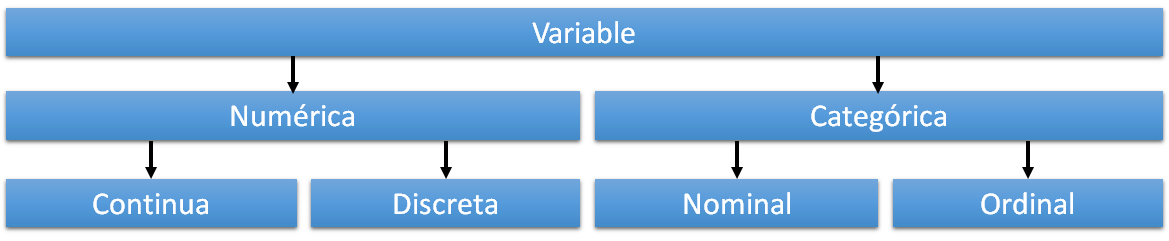

Algunos métodos estadísticos y visualizaciones de datos están diseñados para trabajar mejor con ciertos tipos de datos que con otros. Cómo se muestran mejor los resultados del análisis dependerá del tipo de variables utilizadas en los datos.

Generalmente, cuando entrenamos modelos de Machine Learning como una red neuronal o cuando realizamos reducción de dimensionalidad con un Análisis de Componentes Principales (PCA), antes de introducir los datos, es recomendable transformar todos los valores numéricos a una misma escala, puesto que variables con diferentes escalas pueden sesgar los resultados del modelo. Se puede utilizar algunos tipos de transformaciones como: Normalización, Scaling, Estandarización, entre otras.

**Tipos de transformaciones de variables numéricas**

**Normalización:** transformación al rango entre 0 y 1

**Scaling:** transformación a umbrales mínimo y máximo (pueden ser diferentes de 0 y 1)

**Estandarización:** transformación de datos (media=0, varianza=1)

Los transformadores generalmente se combinan con clasificadores, regresores u otros estimadores para construir un 
estimador compuesto. La herramienta más común para combinar transformadores es un **Pipeline**.

<div id="Importacion" style="color:#106ba3"><h3>Normalización min-max:</h3> </div> $$v´ = \frac{v -min_A}{max_A-min_A} (\text{new_max}_A - \text{new_min}_A) + \text{new_min}_A $$

<div id="Importacion" style="color:#106ba3"><h3>Normalización z-score (estandarización):</h3> </div> $$v´=\frac{v-mean_A}{std_A}$$

<div id="fundamentos-knn" style="color:#106ba3"><h3>Algoritmo KNN</h3> </div>

K-Nearest Neighbor (kNN) es un algoritmo de clasificación y regresión simple pero efectivo que se utiliza para asignar puntos de datos a una clase basada en la mayoría de los votos de sus k vecinos más cercanos [2]. Puede utilizarse en problemas de clasificación, donde el objetivo es predecir una categoría o etiqueta, o en problemas de regresión, donde el objetivo es predecir un valor numérico [3].

KNN es posiblemente el clasificador más intuitivo, que utiliza la distancia entre los ejemplos de entrenamiento como medida de similitud. La distancia entre los puntos representa la diferencia entre los valores de sus funciones. Dado un nuevo punto de datos, un clasificador KNN debe ver los puntos de entrenamiento más cercanos. La clase predicha para el nuevo punto será la clase más común entre los K neighbors [4].

**Pasos del KNN:**
- Calcular las distancias (con medidas de distancia o similaridad)
- Ordenar las distancias e identificar los K vecinos (elementos más cercanos)
- Calcular la decisión. En clasificación sería la clase (función de agregación clásica – el valor más frecuente). En regresión sería un valor continuo (función de agregación clásica - el promedio).

<div id="preparacion-datos" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fase 1: Preparación de datos</h2> </div>

<div id="Importacion" style="color:#106ba3"><h3>Importación de librerías</h3> </div>

In [1]:
from time import time
from datetime import datetime, timedelta
import pandas as pd  
import numpy as np  
from matplotlib import*
from matplotlib.cm import register_cmap
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import seaborn as sns
import copy

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier #KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#from keras.layers import Dropout

from sklearn import metrics 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from scipy import stats
import seaborn
from sklearn import set_config                      
print('Módulos importados')

Módulos importados


<div id="carga" style="color:#106ba3"><h3>Carga de dataset</h3> </div>

### Nombre del dataset: Statlog (German Credit Data) 

Enlace: http://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

Descripción general: Este conjunto de datos clasifica a las personas descritas por un conjunto de atributos como riesgos crediticios buenos o malos.

Número de Variables (o atributos): 21

Número de instancias (clientes en el banco): 1000

Salida: TIPOCLIENTE (BUEN CLIENTE O BAJO RIESGO:1, MAL CLIENTE O ALTO RIESGO:2)

In [2]:
nombresVariables=['ESTADOCUENTACORRIENTE','PLAZOMESESCREDITO','HISTORIALCREDITO','PROPOSITOCREDITO','MONTOCREDITO',
                  'SALDOCUENTAAHORROS','TIEMPOACTUALEMPLEO','TASAPAGO','ESTADOCIVILYSEXO','GARANTE','TIEMPORESIDENCIAACTUAL',
                  'ACTIVOS','EDAD','OTROSPLANESPAGO','VIVIENDA','CANTIDADCREDITOSEXISTENTES','EMPLEO',
                  'CANTIDADPERSONASAMANTENER','TELEFONO','TRABAJADOREXTRANJERO','TIPOCLIENTE']
#Cargar un dataframe desde una URL
dfOriginal = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', sep = ' ', 
                         names=nombresVariables)
#Cargar un dataframe de un archivo local
#dataset = "Datasets/german.data"
#dfOriginal = pd.read_csv(dataset, sep = ' ', names=nombresVariables)

print('cantidad de observaciones (clientes): ',dfOriginal.shape[0])
print('cantidad de variables: ',dfOriginal.shape[1])
print(dfOriginal.shape)
dfOriginal.head()

cantidad de observaciones (clientes):  1000
cantidad de variables:  21
(1000, 21)


,ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,...,ACTIVOS,EDAD,OTROSPLANESPAGO,VIVIENDA,CANTIDADCREDITOSEXISTENTES,EMPLEO,CANTIDADPERSONASAMANTENER,TELEFONO,TRABAJADOREXTRANJERO,TIPOCLIENTE
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


<div id="formato-salida" style="color:#106ba3"><h3>Formato a la variable de salida</h3> </div>

In [3]:
#Se modifica la variable de salida (de estudio): TIPOCLIENTE. Es mejor tener la salida en formato binario cuando hay dos clases
dfOriginal['TIPOCLIENTE'] = dfOriginal['TIPOCLIENTE'].replace(2, 0)
dfOriginal.head()

,ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,...,ACTIVOS,EDAD,OTROSPLANESPAGO,VIVIENDA,CANTIDADCREDITOSEXISTENTES,EMPLEO,CANTIDADPERSONASAMANTENER,TELEFONO,TRABAJADOREXTRANJERO,TIPOCLIENTE
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


<div id="eliminacion-variables" style="color:#106ba3"><h3>Eliminación de variables y separación de variable de salida</h3> </div>

In [5]:
dataframe=copy.deepcopy(dfOriginal)
print(dataframe.shape)
#Se separa la variable de salida "Y" para poder realizar la preparación de datos a las variables independiente "X" 
Y=dataframe['TIPOCLIENTE']
dataframe=dataframe.drop(['OTROSPLANESPAGO'], axis=1)
dataframe=dataframe.drop(['TELEFONO'], axis=1)
dataframe=dataframe.drop(['TIPOCLIENTE'], axis=1)
print(dataframe.shape)
dataframe.head()

(1000, 21)
(1000, 18)


,ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,TIEMPORESIDENCIAACTUAL,ACTIVOS,EDAD,VIVIENDA,CANTIDADCREDITOSEXISTENTES,EMPLEO,CANTIDADPERSONASAMANTENER,TRABAJADOREXTRANJERO
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A152,2,A173,1,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A152,1,A173,1,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A152,1,A172,2,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A153,1,A173,2,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A153,2,A173,2,A201


<div id="analisis-variables" style="color:#106ba3"><h3>Análisis de variables categóricas</h3> </div>

In [6]:
#Determinación de tipos de variables
categorical_ordinal_features = ['ESTADOCUENTACORRIENTE','HISTORIALCREDITO','SALDOCUENTAAHORROS','TIEMPOACTUALEMPLEO',
                                'ESTADOCIVILYSEXO','ACTIVOS','VIVIENDA','EMPLEO']
categorical_nominal_features = ['PROPOSITOCREDITO','GARANTE','TRABAJADOREXTRANJERO']
numeric_features = ['PLAZOMESESCREDITO','MONTOCREDITO','TASAPAGO','TIEMPORESIDENCIAACTUAL','EDAD','CANTIDADCREDITOSEXISTENTES',
                    'CANTIDADPERSONASAMANTENER']

In [7]:
def analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features):
    cantidadTotalVariables = len(dataframe.columns) 
    print('Cantidad de variables antes de transformación de variables: ',cantidadTotalVariables)
    cantidadVariablesNominales = len(categorical_nominal_features)
    cantidadVariablesBinarias=0
    for variable in categorical_nominal_features:
        cantidadCategorias=dataframe[variable].nunique()
        cantidadVariablesBinarias=cantidadVariablesBinarias+cantidadCategorias
        print('Cantidad de categorías en la variable categórica nominal',variable,':',cantidadCategorias)
    print('Cantidad de variables binarias que reemplazarán a las variables categóricas nominales: ',cantidadVariablesBinarias)
    cantidadTotalVariablesConTransformacion = cantidadTotalVariables - cantidadVariablesNominales + cantidadVariablesBinarias
    return cantidadTotalVariablesConTransformacion

In [8]:
cantidadTotalVariablesConTransformacion=analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features)
print('Cantidad de variables que habrá después de la transformación de variables: ',cantidadTotalVariablesConTransformacion)

Cantidad de variables antes de transformación de variables:  18
Cantidad de categorías en la variable categórica nominal PROPOSITOCREDITO : 10
Cantidad de categorías en la variable categórica nominal GARANTE : 3
Cantidad de categorías en la variable categórica nominal TRABAJADOREXTRANJERO : 2
Cantidad de variables binarias que reemplazarán a las variables categóricas nominales:  15
Cantidad de variables que habrá después de la transformación de variables:  30


Hay 3 variables categóricas nominales: 'PROPOSITOCREDITO','GARANTE','TRABAJADOREXTRANJERO'. Estas 3 variables categóricas nominales deben ser reemplazadas por variables binarias.

**PROPOSITOCREDITO:** En principio son 11 categorías. Una categoría (A47) no se aplica puesto que no hay clientes con dicha categoría. Por lo tanto, para PROPOSITOCREDITO quedan 10 categorías, que darán lugar a 10 variables binarias por el proceso de transformación binaria.

- A40 : carro (nuevo)
- A41 : car (usado)
- A42 : mueble/equipo
- A43 : radio/televisión
- A44 : electrodomésticos
- A45 : reparaciones
- A46 : educación
- A47 : (vacaciones) -> en el dataset no hay un cliente que haya pedido un crédito para vacaciones
- A48 : reciclaje
- A49 : negocios
- A410 : otros

**GARANTE:** (A101 : ninguno, A102 : co-aplicante, A103 : garante) = 3 categorías que darán 3 variables binarias

**TRABAJADOREXTRANJERO:** (A201 : yes, A202 : no) = 2 categorías que darán 2 variables binarias

cantidadVariablesBinarias = 10+3+2=15 variables binarias en total

Las 3 variables categóricas nominales serán reemplazadas por las 15 variables binarias

Por lo tanto,

A las 18 variables iniciales se eliminarán las 3 variables categóricas nominales y se agregarán las 15 variables binarias.

18-3+15=30 variables

El dataframe luego de la transformación categórica a numérica tendrá 30 variables. 

<div id="diseño-transformadores" style="color:#106ba3"><h3>Diseño de transformadores</h3> </div>

Por medio de un Pipeline creamos un estimador compuesto. Esta herramienta nos permite combinar preprocesadores y transformadores para llevar un orden y estructura en el proceso de transformación de variables. Para una mejor organización creamos los preprocesadores y sus métodos de transformación.

In [9]:
#Definición de transformadores (preprocesadores)

#1. Preprocesador de variables categóricas a numéricas (ordinales y nominales)
categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())])
categorical_nominal_transformer_ConNombres = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse = False, handle_unknown = "ignore"))])# se ignorará una categoría desconocida
preprocesorCategoricoNumericoConNombres = ColumnTransformer(
    transformers=[
        ('catord', categorical_ordinal_transformer, categorical_ordinal_features),
        ('catnom', categorical_nominal_transformer_ConNombres, categorical_nominal_features)
    ],remainder='passthrough',n_jobs=-1)

#2. Normalización y Scaling: Preprocesador de variables numéricas con transformación MinMaxScaler
minmax_transformer = Pipeline(steps=[
    ('minmax', MinMaxScaler(feature_range=(0, 1)))])
preprocesorMinMax = ColumnTransformer(transformers =[
    ('tranminmax', minmax_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

#3. Estandarización: Preprocesador de variables numéricas con transformación StandardScaler
standardscaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True,with_std=True))])
preprocesorStandardScaler = ColumnTransformer(transformers =[
    ('transcaler', standardscaler_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

#4. Preprocesador de variables numéricas con transformación SimpleImputer
simpleimputer_transformer = Pipeline(steps=[
    ('simpleimputer', SimpleImputer(strategy='median')) #otras: strategy='constant', strategy='most_frequent'
])
preprocesorSimpleImputer = ColumnTransformer(transformers =[
('transimpleimputer', simpleimputer_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

<div id="diseño-pipeline" style="color:#106ba3"><h3>Diseño de pipeline</h3> </div>

El procesador 'prepcn' es indispensable que se aplique antes de los demás preprocesadores numéricos. En el Pipeline "pipe" se aplica primeramente la tansformación de variables categóricas a variables numéricas y en segundo lugar se aplica la transformación numérica. 

In [10]:
#Construcción de Pipeline con transformadores
pipe = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres), 
    #('prepstandard', preprocesorStandardScaler)
    ('prepminmax', preprocesorMinMax)
])

pipeRedNeuronal = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres), 
    #('prepstandard', preprocesorStandardScaler)
    ('prepminmax', preprocesorMinMax)
    ('RN',RedNeuronal)
])

<div id="transformacion-variables" style="color:#106ba3"><h3>Transformación de variables</h3> </div>

In [11]:
#Se ejecuta el pipeline
dataframeTransformado=copy.deepcopy(dataframe)
X_Transformado = pipe.fit_transform(dataframeTransformado)
print('********** Pipeline aplicado')
print('********** Transformador categórico nominal:')
print(pipe.named_steps['prepcn'].transformers_[1])
#Formación de dataframe transformado
cnamesDataset1=[]
if len(categorical_ordinal_features)!=0:
    cnamesDataset1.extend(categorical_ordinal_features)
if len(categorical_nominal_features)!=0:
    #nos ubicamos primeramente en el paso "prepcn" 
    #luego, en el transformador "catnom" que está en [1] y luego en "onehot", por eso [1][1] 
    cnamesDataset2 = pipe.named_steps['prepcn'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_nominal_features)
    cnamesDataset1.extend(cnamesDataset2)
cnamesDataset3 = numeric_features
cnamesDataset1.extend(cnamesDataset3)
print('********** Lista de variables:')
print(cnamesDataset1)
dataframeTransformado = pd.DataFrame(data=X_Transformado,columns=cnamesDataset1)
#Guardar el dataset sin etiquetas como csv
dataframeTransformado.to_csv("DatasetTransformadoSinEtiquetas.csv", sep=";",index = False)
#Se agrega la variable de salida (etiquetas) al final
dataframeTransformado = pd.concat([dataframeTransformado, Y], axis = 1)
#Guardar el dataset con etiquetas como csv
dataframeTransformado.to_csv("DatasetTransformadoConEtiquetas.csv", sep=";",index = False)
dataframeTransformado.head()

********** Pipeline aplicado
********** Transformador categórico nominal:
('catnom', Pipeline(steps=[('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))]), ['PROPOSITOCREDITO', 'GARANTE', 'TRABAJADOREXTRANJERO'])
********** Lista de variables:
['ESTADOCUENTACORRIENTE', 'HISTORIALCREDITO', 'SALDOCUENTAAHORROS', 'TIEMPOACTUALEMPLEO', 'ESTADOCIVILYSEXO', 'ACTIVOS', 'VIVIENDA', 'EMPLEO', 'PROPOSITOCREDITO_A40', 'PROPOSITOCREDITO_A41', 'PROPOSITOCREDITO_A410', 'PROPOSITOCREDITO_A42', 'PROPOSITOCREDITO_A43', 'PROPOSITOCREDITO_A44', 'PROPOSITOCREDITO_A45', 'PROPOSITOCREDITO_A46', 'PROPOSITOCREDITO_A48', 'PROPOSITOCREDITO_A49', 'GARANTE_A101', 'GARANTE_A102', 'GARANTE_A103', 'TRABAJADOREXTRANJERO_A201', 'TRABAJADOREXTRANJERO_A202', 'PLAZOMESESCREDITO', 'MONTOCREDITO', 'TASAPAGO', 'TIEMPORESIDENCIAACTUAL', 'EDAD', 'CANTIDADCREDITOSEXISTENTES', 'CANTIDADPERSONASAMANTENER']


,ESTADOCUENTACORRIENTE,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,ESTADOCIVILYSEXO,ACTIVOS,VIVIENDA,EMPLEO,PROPOSITOCREDITO_A40,PROPOSITOCREDITO_A41,...,TRABAJADOREXTRANJERO_A201,TRABAJADOREXTRANJERO_A202,PLAZOMESESCREDITO,MONTOCREDITO,TASAPAGO,TIEMPORESIDENCIAACTUAL,EDAD,CANTIDADCREDITOSEXISTENTES,CANTIDADPERSONASAMANTENER,TIPOCLIENTE
0,0.000000,1.00,1.0,1.00,0.666667,0.000000,0.5,0.666667,0.0,0.0,...,1.0,0.0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,1
1,0.333333,0.50,0.0,0.50,0.333333,0.000000,0.5,0.666667,0.0,0.0,...,1.0,0.0,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0
2,1.000000,1.00,0.0,0.75,0.666667,0.000000,0.5,0.333333,0.0,0.0,...,1.0,0.0,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,1
3,0.000000,0.50,0.0,0.75,0.666667,0.333333,1.0,0.666667,0.0,0.0,...,1.0,0.0,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,1
4,0.000000,0.75,0.0,0.50,0.666667,1.000000,1.0,0.666667,1.0,0.0,...,1.0,0.0,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0


In [12]:
# Funciones para guardar y cargar un Pipeline o Modelo
def guardarPipeline(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)

def cargarPipeline(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    return pipeline

In [13]:
guardarPipeline(pipe,'pipePreprocesadores')
pipe=None
pipe=cargarPipeline('pipePreprocesadores')
set_config(display='diagram')
pipe

Pipeline(steps=[('prepcn',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('catord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['ESTADOCUENTACORRIENTE',
                                                   'HISTORIALCREDITO',
                                                   'SALDOCUENTAAHORROS',
                                                   'TIEMPOACTUALEMPLEO',
                                                   'ESTADOCIVILYSEXO',
                                                   'ACTIVOS', 'VIVIENDA',
                                                   'EMPLEO']),
                                                 ('catnom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['PROPOSITOCREDITO',
                                                   'GARANTE',
                                                   'TRABAJADOREXTRANJERO'])])),
                ('prepminmax',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tranminmax',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28,
                                                   29])]))])

<div id="analisis-correlacion" style="color:#106ba3"><h3>Análisis de correlación</h3> </div>

En esta subsección se realiza un mapa de calor de las correlaciones entre todas las variables para identificar las variables más relevantes e influyentes a la variable de salida.

In [14]:
dfCorrel=copy.deepcopy(dataframeTransformado)
dfCorrel=dfCorrel.corr()
dfCorrel.head()

,ESTADOCUENTACORRIENTE,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,ESTADOCIVILYSEXO,ACTIVOS,VIVIENDA,EMPLEO,PROPOSITOCREDITO_A40,PROPOSITOCREDITO_A41,...,TRABAJADOREXTRANJERO_A201,TRABAJADOREXTRANJERO_A202,PLAZOMESESCREDITO,MONTOCREDITO,TASAPAGO,TIEMPORESIDENCIAACTUAL,EDAD,CANTIDADCREDITOSEXISTENTES,CANTIDADPERSONASAMANTENER,TIPOCLIENTE
ESTADOCUENTACORRIENTE,1.000000,0.192191,0.222867,0.106339,0.043261,-0.032260,0.022424,0.040663,-0.069559,0.064303,...,0.026758,-0.026758,-0.072013,-0.042705,-0.005280,-0.042234,0.059751,0.076005,-0.014145,0.350847
HISTORIALCREDITO,0.192191,1.000000,0.039058,0.138225,0.042171,-0.053777,0.062095,0.010350,0.042480,0.039096,...,-0.013873,0.013873,-0.077186,-0.059905,0.044375,0.063198,0.147086,0.437066,0.011550,0.228785
SALDOCUENTAAHORROS,0.222867,0.039058,1.000000,0.120950,0.017349,0.018948,0.006505,0.011709,-0.002348,0.112880,...,-0.007095,0.007095,0.047661,0.064630,0.021993,0.091424,0.084245,-0.021644,0.027514,0.178943
TIEMPOACTUALEMPLEO,0.106339,0.138225,0.120950,1.000000,0.111278,0.087187,0.111126,0.101225,-0.021232,0.039358,...,0.027232,-0.027232,0.057381,-0.008367,0.126161,0.245081,0.256227,0.125791,0.097192,0.116002
ESTADOCIVILYSEXO,0.043261,0.042171,0.017349,0.111278,1.000000,-0.006940,0.099579,-0.011956,0.014725,0.040694,...,-0.065618,0.065618,0.014789,-0.016091,0.119308,-0.027269,0.007783,0.064672,0.122165,0.088184


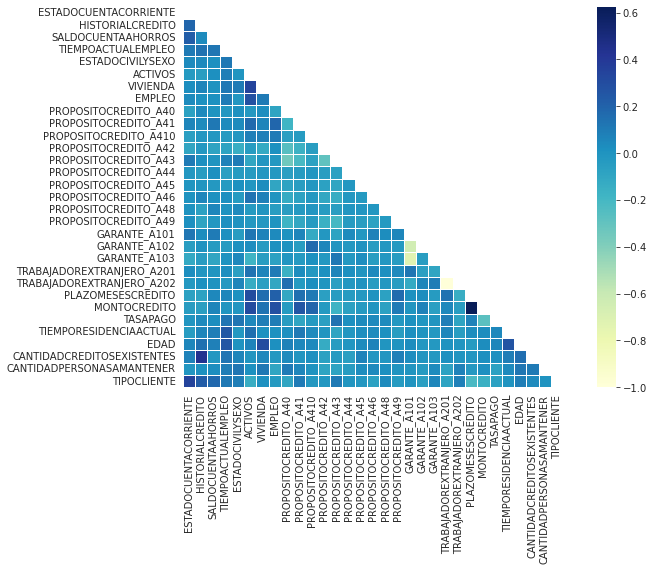

In [15]:
#Generar el mapa de calor de las correlaciones
mask = np.zeros_like(dfCorrel)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 7))
    ax = sns.heatmap(dfCorrel, mask=mask, square=True, linewidths=.5, cmap="YlGnBu")
    #ax = sns.heatmap(dfCorrel, cmap ='viridis', linewidths = 0.30, annot = True)
    #ax = sns.heatmap(dfCorrel, cmap ='GnBu', linewidths = 0.30, annot = False)
    #ax = sns.heatmap(dfCorrel, cmap ='YlGnBu', linewidths = 0.30, annot = False)
plt.savefig('attribute_correlations.png')

In [16]:
#Se presenta las variables más correlacionadas positivamente con respecto a la variable de salida 
dfCorrOrdenado=dfCorrel.sort_values(by=['TIPOCLIENTE'], ascending=False)
dfCorrOrdenado['TIPOCLIENTE'].head(10)

TIPOCLIENTE                  1.000000
ESTADOCUENTACORRIENTE        0.350847
HISTORIALCREDITO             0.228785
SALDOCUENTAAHORROS           0.178943
TIEMPOACTUALEMPLEO           0.116002
PROPOSITOCREDITO_A43         0.106922
PROPOSITOCREDITO_A41         0.099791
EDAD                         0.091127
ESTADOCIVILYSEXO             0.088184
TRABAJADOREXTRANJERO_A202    0.082079
Name: TIPOCLIENTE, dtype: float64

In [17]:
#Se presenta las variables más correlacionadas negativamente con respecto a la variable de salida 
dfCorrOrdenado=dfCorrel.sort_values(by=['TIPOCLIENTE'], ascending=True)
dfCorrOrdenado['TIPOCLIENTE'].head(10)

PLAZOMESESCREDITO           -0.214927
MONTOCREDITO                -0.154739
ACTIVOS                     -0.142612
PROPOSITOCREDITO_A40        -0.096900
TRABAJADOREXTRANJERO_A201   -0.082079
TASAPAGO                    -0.072404
PROPOSITOCREDITO_A46        -0.070088
GARANTE_A102                -0.062728
PROPOSITOCREDITO_A49        -0.036129
EMPLEO                      -0.032735
Name: TIPOCLIENTE, dtype: float64

<div id="seleccion-extraccion-variables" style="color:#106ba3"><h3>Selección y extracción de variables</h3> </div>

Se seleccionan las variables con mayor correlación. También se podría omitir este paso y continuar con todas las variables.

In [18]:
dataframeExtraccion=dataframeTransformado[['ESTADOCUENTACORRIENTE','HISTORIALCREDITO','SALDOCUENTAAHORROS','TIEMPOACTUALEMPLEO','PLAZOMESESCREDITO', 'MONTOCREDITO', 'ACTIVOS','TIPOCLIENTE']]
print(dataframeExtraccion.shape)
dataframeExtraccion.head()

(1000, 8)


,ESTADOCUENTACORRIENTE,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,PLAZOMESESCREDITO,MONTOCREDITO,ACTIVOS,TIPOCLIENTE
0,0.000000,1.00,1.0,1.00,0.029412,0.050567,0.000000,1
1,0.333333,0.50,0.0,0.50,0.647059,0.313690,0.000000,0
2,1.000000,1.00,0.0,0.75,0.117647,0.101574,0.000000,1
3,0.000000,0.50,0.0,0.75,0.558824,0.419941,0.333333,1
4,0.000000,0.75,0.0,0.50,0.294118,0.254209,1.000000,0


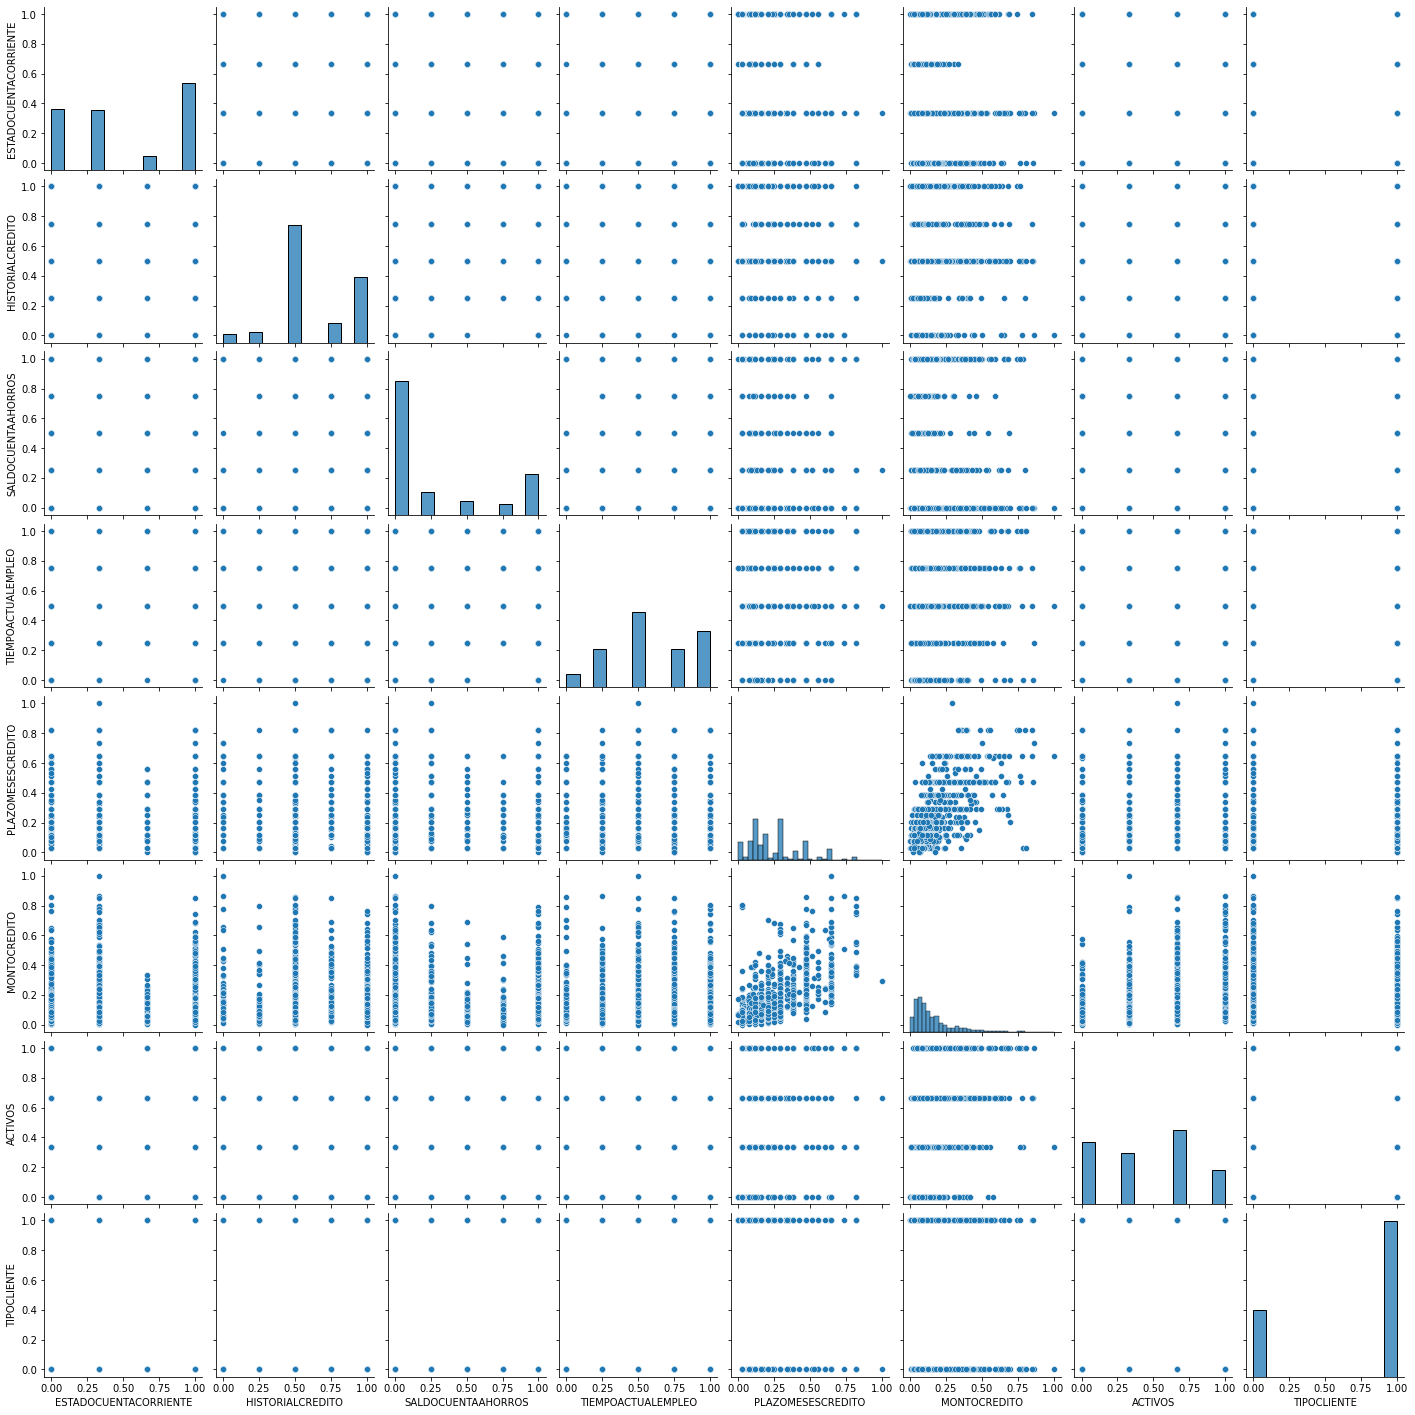

In [19]:
#Generar todas las figuras de correlaciones entre cada par de variables
sns.pairplot(dataframeExtraccion)
plt.show()

<div id="transformacion-numerica-adicional" style="color:#106ba3"><h3>Transformación numérica adicional: Min max scaling</h3> </div>

In [20]:
from sklearn import preprocessing
dataframeExtraccion=dataframeExtraccion.drop(['TIPOCLIENTE'], axis=1)

In [21]:
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled_minmax = data_scaler_minmax.fit_transform(dataframeExtraccion)
print("\nDatos normalizados con escala Min Max:\n")
DataframeTransformado1 = pd.DataFrame(data=data_scaled_minmax,columns=dataframeExtraccion.columns)
DataframeTransformado1 = pd.concat([DataframeTransformado1, dataframeTransformado[['TIPOCLIENTE']]], axis = 1)
DataframeTransformado1.to_csv("DatasetBancoTransformadoMinMax.csv", sep=";",index = False) 
DataframeTransformado1.head()


Datos normalizados con escala Min Max:



,ESTADOCUENTACORRIENTE,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,PLAZOMESESCREDITO,MONTOCREDITO,ACTIVOS,TIPOCLIENTE
0,0.000000,1.00,1.0,1.00,0.029412,0.050567,0.000000,1
1,0.333333,0.50,0.0,0.50,0.647059,0.313690,0.000000,0
2,1.000000,1.00,0.0,0.75,0.117647,0.101574,0.000000,1
3,0.000000,0.50,0.0,0.75,0.558824,0.419941,0.333333,1
4,0.000000,0.75,0.0,0.50,0.294118,0.254209,1.000000,0


<div style="color:#106ba3"><h3>Transformación numérica adicional: Normalización L1 y L2</h3> </div>

In [22]:
#Normalización L1: la suma de los valores absolutos es igual a 1
data_normalized_l1 = preprocessing.normalize(dataframeExtraccion, norm='l1')
#Normalización L2: la suma de los cuadrados es igual a 1
data_normalized_l2 = preprocessing.normalize(dataframeExtraccion, norm='l2')
print("\nDatos normalizados con L2:\n")

DataframeTransformado2 = pd.DataFrame(data=data_normalized_l1,columns=dataframeExtraccion.columns)
DataframeTransformado2 = pd.concat([DataframeTransformado2, dataframeTransformado[['TIPOCLIENTE']]], axis = 1)
DataframeTransformado2.to_csv("DatasetBancoTransformadoNormL1.csv", sep=";",index = False)
DataframeTransformado2.head()

DataframeTransformado3 = pd.DataFrame(data=data_normalized_l2,columns=dataframeExtraccion.columns)
DataframeTransformado3 = pd.concat([DataframeTransformado3, dataframeTransformado[['TIPOCLIENTE']]], axis = 1)
DataframeTransformado3.to_csv("DatasetBancoTransformadoNormL2.csv", sep=";",index = False)
DataframeTransformado3.head()


Datos normalizados con L2:



,ESTADOCUENTACORRIENTE,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,PLAZOMESESCREDITO,MONTOCREDITO,ACTIVOS,TIPOCLIENTE
0,0.000000,0.577021,0.577021,0.577021,0.016971,0.029178,0.000000,1
1,0.313824,0.470736,0.000000,0.470736,0.609188,0.295330,0.000000,0
2,0.621771,0.621771,0.000000,0.466328,0.073150,0.063156,0.000000,1
3,0.000000,0.420741,0.000000,0.631112,0.470240,0.353373,0.280494,1
4,0.000000,0.535219,0.000000,0.356813,0.209890,0.181410,0.713626,0


<div style="color:#106ba3"><h3>Transformación numérica adicional: Estandarización</h3> </div>

In [23]:
XEstandarizado = preprocessing.scale(dataframeExtraccion)
print("\nDatos estandarizados:\n")

DataframeTransformado4 = pd.DataFrame(data=XEstandarizado,columns=dataframeExtraccion.columns)
DataframeTransformado4 = pd.concat([DataframeTransformado4, dataframeTransformado[['TIPOCLIENTE']]], axis = 1)
DataframeTransformado4.to_csv("DatasetBancoTransformadoScale.csv", sep=";",index = False)
DataframeTransformado4.head()


Datos estandarizados:



,ESTADOCUENTACORRIENTE,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,PLAZOMESESCREDITO,MONTOCREDITO,ACTIVOS,TIPOCLIENTE
0,-1.254566,1.344014,1.833169,1.338078,-1.236478,-0.745131,-1.293723,1
1,-0.459026,-0.503428,-0.699707,-0.317959,2.248194,0.949817,-1.293723,0
2,1.132053,1.344014,-0.699707,0.510060,-0.738668,-0.416562,-1.293723,1
3,-1.254566,-0.503428,-0.699707,0.510060,1.750384,1.634247,-0.341055,1
4,-1.254566,0.420293,-0.699707,-0.317959,0.256953,0.566664,1.564281,0


<div id="Transformacion-nuevos-samples" style="color:#106ba3"><h3>Transformación de nuevos samples</h3> </div>

La siguiente función permite transformar las variables de un nuevo cliente a un formato numérico. En la función se define el valor por defecto de las variables, se crea el dataframe con los nuevos valores y los nombres de las variables. Luego, se aplica la transformación de variables mediante el Pipeline. 

In [24]:
def preprocesarNuevoCliente(ESTADOCUENTACORRIENTE='A12', PLAZOMESESCREDITO=6, HISTORIALCREDITO='A34', PROPOSITOCREDITO='A43',
                            MONTOCREDITO=1169, SALDOCUENTAAHORROS='A65', TIEMPOACTUALEMPLEO='A75', TASAPAGO=4, 
                            ESTADOCIVILYSEXO='A93', GARANTE='A101', TIEMPORESIDENCIAACTUAL=4, ACTIVOS='A121', EDAD=67, 
                            VIVIENDA='A152', CANTIDADCREDITOSEXISTENTES=2, EMPLEO='A173', CANTIDADPERSONASAMANTENER=2,
                            TRABAJADOREXTRANJERO='A201'):    
    cnames=['ESTADOCUENTACORRIENTE','PLAZOMESESCREDITO','HISTORIALCREDITO','PROPOSITOCREDITO','MONTOCREDITO',
            'SALDOCUENTAAHORROS','TIEMPOACTUALEMPLEO','TASAPAGO','ESTADOCIVILYSEXO','GARANTE','TIEMPORESIDENCIAACTUAL',
            'ACTIVOS','EDAD','VIVIENDA','CANTIDADCREDITOSEXISTENTES','EMPLEO','CANTIDADPERSONASAMANTENER',
            'TRABAJADOREXTRANJERO']
    Xnew=[ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,
          TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,TIEMPORESIDENCIAACTUAL,ACTIVOS,EDAD,VIVIENDA,
          CANTIDADCREDITOSEXISTENTES,EMPLEO,CANTIDADPERSONASAMANTENER,TRABAJADOREXTRANJERO]
    Xnew_Dataframe = pd.DataFrame(data=[Xnew],columns=cnames)
    Xnew_Preprocesado = pipe.transform(Xnew_Dataframe)
    return Xnew_Preprocesado

ESTADOCUENTACORRIENTE='A12'
PLAZOMESESCREDITO=6
HISTORIALCREDITO='A34'
PROPOSITOCREDITO='A43'
MONTOCREDITO=1169
SALDOCUENTAAHORROS='A65'
TIEMPOACTUALEMPLEO='A75'
TASAPAGO=4
ESTADOCIVILYSEXO='A93'
GARANTE='A101'
TIEMPORESIDENCIAACTUAL=4 
ACTIVOS='A121'
EDAD=67
VIVIENDA='A152'
CANTIDADCREDITOSEXISTENTES=2
EMPLEO='A173'
CANTIDADPERSONASAMANTENER=2
TRABAJADOREXTRANJERO='A201'

Xnew_Preprocesado=preprocesarNuevoCliente(ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,
                                          MONTOCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,
                                          TIEMPORESIDENCIAACTUAL,ACTIVOS,EDAD,VIVIENDA,CANTIDADCREDITOSEXISTENTES,EMPLEO,
                                          CANTIDADPERSONASAMANTENER,TRABAJADOREXTRANJERO)
Xnew_Preprocesado

array([[0.33333333, 1.        , 1.        , 1.        , 0.66666667,
        0.        , 0.5       , 0.66666667, 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.02941176, 0.05056674,
        1.        , 1.        , 0.85714286, 0.33333333, 1.        ]])

<div id="clasificacion-knn" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fase 2: Clasificación con el algoritmo KNN, evaluación y optimización</h2> </div>

A partir de la carga del dataset transformado se proceder con la fase de clasificación. Para ello, se debe indicar el csv deseado.

In [25]:
dataframeTransformado=pd.read_csv("DatasetTransformadoConEtiquetas.csv", sep=";")
dataframeTransformado['TIPOCLIENTE'] = dataframeTransformado['TIPOCLIENTE'].replace(2, 0)
print(dataframeTransformado.shape)
dataframeTransformado.head()

(1000, 31)


,ESTADOCUENTACORRIENTE,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,ESTADOCIVILYSEXO,ACTIVOS,VIVIENDA,EMPLEO,PROPOSITOCREDITO_A40,PROPOSITOCREDITO_A41,...,TRABAJADOREXTRANJERO_A201,TRABAJADOREXTRANJERO_A202,PLAZOMESESCREDITO,MONTOCREDITO,TASAPAGO,TIEMPORESIDENCIAACTUAL,EDAD,CANTIDADCREDITOSEXISTENTES,CANTIDADPERSONASAMANTENER,TIPOCLIENTE
0,0.000000,1.00,1.0,1.00,0.666667,0.000000,0.5,0.666667,0.0,0.0,...,1.0,0.0,0.029412,0.050567,1.000000,1.000000,0.857143,0.333333,0.0,1
1,0.333333,0.50,0.0,0.50,0.333333,0.000000,0.5,0.666667,0.0,0.0,...,1.0,0.0,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,0
2,1.000000,1.00,0.0,0.75,0.666667,0.000000,0.5,0.333333,0.0,0.0,...,1.0,0.0,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,1
3,0.000000,0.50,0.0,0.75,0.666667,0.333333,1.0,0.666667,0.0,0.0,...,1.0,0.0,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,1
4,0.000000,0.75,0.0,0.50,0.666667,1.000000,1.0,0.666667,1.0,0.0,...,1.0,0.0,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0


In [26]:
# Función para guardar un modelo
def guardarModelo(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("********** Pickle guardado")

# Función para transformar la predicción         
def transformarPrediccion(lista):
    for i in range(len(lista)):
        desempenio=lista[i]
        #print(desempenio)
        if (desempenio < 0.5):
            desempenio = 0
        elif (desempenio >= 0.5):
            desempenio = 1
        lista[i]=desempenio
    return lista

In [27]:
Y = dataframeTransformado['TIPOCLIENTE']
dataframeTransformado=dataframeTransformado.drop(['TIPOCLIENTE'], axis=1)
X_Transformado=dataframeTransformado.values
X_Transformado

array([[0.        , 1.        , 1.        , ..., 0.85714286, 0.33333333,
        0.        ],
       [0.33333333, 0.5       , 0.        , ..., 0.05357143, 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.53571429, 0.        ,
        1.        ],
       ...,
       [1.        , 0.5       , 0.        , ..., 0.33928571, 0.        ,
        0.        ],
       [0.        , 0.5       , 0.        , ..., 0.07142857, 0.        ,
        0.        ],
       [0.33333333, 1.        , 0.25      , ..., 0.14285714, 0.        ,
        0.        ]])

<div id="diseno-optimizacion" style="color:#106ba3"><h3>Diseño y optimización</h3> </div>

En esta sección se evalúa el método KNN con distintos valores de parámetros.  El código itera a través de diferentes distancias (por ejemplo, euclidiana, manhattan, chebyshev y una personalizada) y diferentes valores de K (10, 20, 30, etc.) para evaluar el rendimiento del modelo. Se calculan varias métricas de rendimiento, como: Error Absoluto Medio (MAE), Error Cuadrático Medio (MSE), Raíz del Error Cuadrático Medio (RMSE), Accuracy (ACC), Precision, Recall (Sensibilidad) y F1-Score. Estas métricas miden el rendimiento del modelo en la clasificación de datos. Se ejecuta N experimentos por cada valor de K. Luego, se calcula el promedio de los N experimentos.

In [28]:
# Define tu propia función de distancia personalizada
def distancia_personalizada(x, y):
    # Por ejemplo, aquí utilizamos la distancia Euclidiana con un peso especial
    return ((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2) * 0.5

In [29]:
# Crear un DataFrame vacío con las columnas deseadas
columnas = ['DISTANCE','K','ACC','PRECISION','RECALL','F1-SCORE']
# Definr el tipo de dato de cada columna
tipos_de_variable = [str, int, float, float, float, float]
# Crear un dataframe vacío, a este dataframe se agregarán fila a fila los resultados de KNN
dataResultados = pd.DataFrame(columns=columnas)
model=None
# Definir las distancias a calcular
DISTANCE=['euclidean','manhattan','chebyshev','propia']
# Definir los valores de K (la cantidad de vecinos que conforman el vecindario)
K=[10,20,30,40,50,60,70,80,90,100]
valoresK=K
# Definir la cantidad de experimentos que se repiten por cada valor de K. Luego, se calculará el promedio de nExperimentos
nExperimentos=5
for idexp in range(nExperimentos):
    # Crear las particiones del conjunto de datos. De manera convencional, el conjunto de test contiene el 20% de los datos.
    X_train, X_test, y_train, y_test = train_test_split(X_Transformado, Y, test_size = 0.2)
    for d in DISTANCE:
        for k in K:
            # Llamar a la función personalizada
            if d=='propia':
                model=KNeighborsClassifier(n_neighbors=k, metric=distancia_personalizada)
            else:
                model=KNeighborsClassifier(n_neighbors=k, metric=d)#clásicas: euclidean,manhattan,minkowski,chebyshev
            # Entrenar el modelo
            history = model.fit(X_train, y_train)
            # Calcular predicciones para el conjunto de Test
            y_pred = model.predict(X_test)
            y_pred = y_pred.flatten()
            # Transformar salida continua a discreta (binaria)
            y_pred = transformarPrediccion(y_pred)
            # Evaluar el modelo con medidas de calidad
            MAE=metrics.mean_absolute_error(y_test, y_pred)
            MSE=metrics.mean_squared_error(y_test, y_pred)
            RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
            y_testBinario = (y_test >= 0.5).astype("int32")
            y_predBinario = (y_pred >= 0.5).astype("int32")
            ACC=float(str(accuracy_score(y_testBinario, y_predBinario)))
            precision=precision_score(y_testBinario, y_predBinario)
            recall=recall_score(y_testBinario, y_predBinario)
            f1=f1_score(y_testBinario, y_predBinario)
            MAE=float(str(round(MAE, 4)))
            MSE=float(str(round(MSE, 4)))
            RMSE=float(str(round(RMSE, 4)))
            precision=float(str(round(precision, 4)))
            recall=float(str(round(recall, 4)))
            f1=float(str(round(f1, 4)))
            valor=[d,k,ACC,precision,recall,f1]
            # print(valor)
            fila = pd.Series(valor, index=columnas)
            # Agregar los resultados en el dataframe
            dataResultados = pd.concat([dataResultados, fila.to_frame().T], ignore_index=True)
# Convertir el tipo de datos de cada columna 
dataResultados['K'] = dataResultados['K'].astype(int)
dataResultados['ACC'] = dataResultados['ACC'].astype(float)
dataResultados['PRECISION'] = dataResultados['PRECISION'].astype(float)
dataResultados['RECALL'] = dataResultados['RECALL'].astype(float)
dataResultados['F1-SCORE'] = dataResultados['F1-SCORE'].astype(float)
dataResultados = dataResultados.sort_values(by=['DISTANCE','K'])
dataResultados = dataResultados.reset_index(drop=True)
dataResultados.head(10)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,10,0.735,0.7711,0.8951,0.8285
1,chebyshev,10,0.720,0.7688,0.8662,0.8146
2,chebyshev,10,0.710,0.7134,0.9141,0.8014
3,chebyshev,10,0.720,0.7470,0.8986,0.8158
4,chebyshev,10,0.655,0.7296,0.8169,0.7708
5,chebyshev,20,0.730,0.7459,0.9441,0.8333
6,chebyshev,20,0.720,0.7529,0.9014,0.8205
7,chebyshev,20,0.710,0.6966,0.9688,0.8105
8,chebyshev,20,0.715,0.7189,0.9638,0.8235
9,chebyshev,20,0.715,0.7485,0.9014,0.8179


<div id="filtro-resultados" style="color:#106ba3"><h3>Filtro de resultados</h3> </div>

In [30]:
#Filtrar por algunos valores de k
valoresK=[10,20,30,40,50,60,70,80,90,100]
#Nmin=10
#Nmax=40
#dataResultados=dataResultados.loc[(dataResultados['K'] >= Nmin) & (dataResultados['K'] <= Nmax)]
dataResultados=dataResultados.loc[(dataResultados['K'].isin(valoresK))]
dataResultados.head(10)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,10,0.735,0.7711,0.8951,0.8285
1,chebyshev,10,0.720,0.7688,0.8662,0.8146
2,chebyshev,10,0.710,0.7134,0.9141,0.8014
3,chebyshev,10,0.720,0.7470,0.8986,0.8158
4,chebyshev,10,0.655,0.7296,0.8169,0.7708
5,chebyshev,20,0.730,0.7459,0.9441,0.8333
6,chebyshev,20,0.720,0.7529,0.9014,0.8205
7,chebyshev,20,0.710,0.6966,0.9688,0.8105
8,chebyshev,20,0.715,0.7189,0.9638,0.8235
9,chebyshev,20,0.715,0.7485,0.9014,0.8179


<div id="agrupar-distancia-k" style="color:#106ba3"><h3>Agrupar resultados por medida de distancia y cantidad de vecinos (K)</h3> </div>

Se agrupa los resultados por medida de distancia y cantidad de vecinos. Se puede apreciar los resultados de N experimentos por cada valor de K. 

In [31]:
dataResultados = dataResultados.groupby(['DISTANCE','K'])
dataResultados.head(5)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,10,0.735,0.7711,0.8951,0.8285
1,chebyshev,10,0.720,0.7688,0.8662,0.8146
2,chebyshev,10,0.710,0.7134,0.9141,0.8014
3,chebyshev,10,0.720,0.7470,0.8986,0.8158
4,chebyshev,10,0.655,0.7296,0.8169,0.7708
...,...,...,...,...,...,...
195,propia,100,0.755,0.7938,0.8881,0.8383
196,propia,100,0.735,0.7330,0.9859,0.8408
197,propia,100,0.685,0.6702,1.0000,0.8025
198,propia,100,0.705,0.7484,0.8623,0.8013


Se procede a calcular el promedio de los N experimentos

In [32]:
dataResultados = dataResultados.mean()
dataResultados = dataResultados.reset_index()
dataResultados = dataResultados.reset_index(drop=True)
dataResultados = dataResultados.groupby(['DISTANCE'])
dataResultados.head(5)

,DISTANCE,K,ACC,PRECISION,RECALL,F1-SCORE
0,chebyshev,10,0.708,0.74598,0.87818,0.80622
1,chebyshev,20,0.718,0.73256,0.93590,0.82114
2,chebyshev,30,0.716,0.72344,0.95772,0.82346
3,chebyshev,40,0.709,0.71336,0.97184,0.82208
4,chebyshev,50,0.697,0.70386,0.97468,0.81658
10,euclidean,10,0.738,0.77684,0.87428,0.82182
11,euclidean,20,0.743,0.76978,0.89804,0.82852
12,euclidean,30,0.737,0.75166,0.92894,0.82994
13,euclidean,40,0.733,0.74082,0.94726,0.83066
14,euclidean,50,0.730,0.73450,0.95880,0.83088


<div id="visualizacion" style="color:#106ba3"><h3>Visualización de resultados</h3> </div>

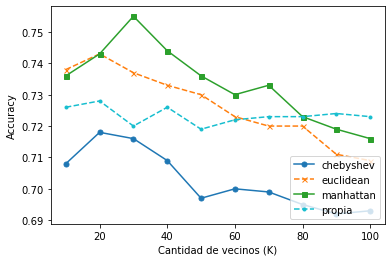

In [33]:
for name in dataResultados.groups.keys():
    group = dataResultados.get_group(name)
    #print(name)
    valores=group.ACC.values.tolist()
    #print(valores)
    #SIN EFECTO SUAVIZADO
    if name=='euclidean': plt.plot(valoresK, valores, marker='x', linestyle='--', color='C1', ms=5, label = name) 
    if name=='manhattan': plt.plot(valoresK, valores, marker='s', linestyle='-', color='C2', ms=5, label = name)    
    if name=='propia': plt.plot(valoresK, valores, marker='o', linestyle='--', color='C9', ms=3, label = name)
    if name=='chebyshev': plt.plot(valoresK, valores, marker='.', linestyle='-', color='C0', ms=10, label = name)
    #plt.title("Resultados")
    plt.xlabel("Cantidad de vecinos (K)")   # Inserta el título del eje X 
    plt.ylabel("Accuracy")   # Inserta el título del eje Y
    plt.legend(loc="lower right")

Se agrega un efecto suavizado (creación de curvas de ajuste) y más puntos mediante una interpolación. La interpolación es un proceso matemático que implica estimar valores desconocidos o faltantes entre dos o más puntos de datos conocidos. Se utiliza para crear una función suave que pase a través de los puntos de datos existentes y permita predecir o estimar valores para ubicaciones o puntos intermedios.

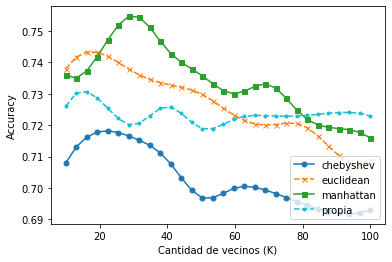

In [34]:
from scipy.interpolate import make_interp_spline, BSpline 
for name in dataResultados.groups.keys():
    group = dataResultados.get_group(name)
    #print(name)
    valores=group.ACC.values.tolist()
    #print(valores)
    #EFECTO SUAVIZADO: GENERAR PUNTOS CON UNA REGRESIÓN ENTRE LOS VALORES QUE TENEMOS
    numeroPuntos=len(valoresK)*3  #representa el número de puntos para generar entre T.min and T.max 
    xnew = np.linspace(min(valoresK),max(valoresK),numeroPuntos) #linspace genera puntos en un rango
    spl = make_interp_spline(valoresK, valores, k=3) #BSpline object 
    power_smooth = spl(xnew)         
    if name=='euclidean': plt.plot(xnew, power_smooth, marker='x', linestyle='--', color='C1', ms=5, label = name) 
    if name=='manhattan': plt.plot(xnew, power_smooth, marker='s', linestyle='-', color='C2', ms=5, label = name)    
    if name=='propia': plt.plot(xnew, power_smooth, marker='o', linestyle='--', color='C9', ms=3, label = name)
    if name=='chebyshev': plt.plot(xnew, power_smooth, marker='.', linestyle='-', color='C0', ms=10, label = name) 
        
    #plt.title("Resultados")
    plt.xlabel("Cantidad de vecinos (K)")   # Inserta el título del eje X 
    plt.ylabel("Accuracy")   # Inserta el título del eje Y
    plt.legend(loc="lower right")

<div id="metodo-optimizado" style="color:#106ba3"><h3>Diseño y entrenamiento del modelo optimizado</h3> </div>

In [35]:
#Construcción de modelo KNN
model=KNeighborsRegressor(n_neighbors=25, metric='manhattan')#euclidean,manhattan,minkowski,chebyshev 
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_Transformado, Y, test_size = 0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
history = model.fit(X_train, y_train)
print('Modelo entrenado')
#Se guarda el modelo entrenado
guardarModelo(model,'modeloKNN')
print('Modelo Optimizado Guardado')

(800, 30) (800,)
(200, 30) (200,)
Modelo entrenado
********** Pickle guardado
Modelo Optimizado Guardado


<div id="prediccion-test" style="color:#106ba3"><h3>Predicción con el conjunto de Test</h3> </div>

In [36]:
#Predicciones
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
y_pred = transformarPrediccion(y_pred)
dataframeFinal=pd.DataFrame({'real':y_test, 'predicción clase': y_pred})
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
dataframeFinal.head(10)

,real,predicción clase
543,0,1.0
635,1,1.0
255,1,1.0
971,1,1.0
395,1,0.0
890,1,1.0
921,1,1.0
985,1,1.0
834,0,1.0
757,0,1.0


<div id="evaluacion-calidad" style="color:#106ba3"><h3>Evaluación de la calidad del modelo</h3> </div>

Mean Absolute Error (MAE): 0.245
Mean Squared Error (MSE): 0.245
Root Mean Squared Error (RMSE): 0.495
Accuracy: 0.755
Precision:  0.7542
Recall:  0.9643
F1: 0.8464
Matriz de confusión:
Verdaderos negativos:  16  Falsos positivos:  44  Falsos negativos:  5  Verdaderos positivos:  135


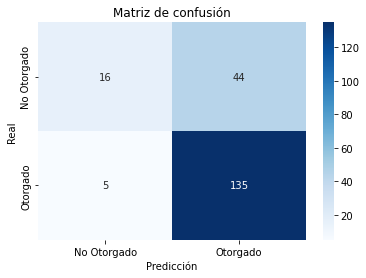

In [37]:
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)  
print('Mean Squared Error (MSE):', MSE)  
print('Root Mean Squared Error (RMSE):', RMSE) 

y_testBinario = (y_test >= 0.5).astype("int32")
y_predBinario = (y_pred >= 0.5).astype("int32")

#y_pred=y_pred.flatten()# de 2D a 1D

accuracyModeloBase=str(accuracy_score(y_testBinario, y_predBinario))
print('Accuracy: ' + accuracyModeloBase) 

precision=precision_score(y_testBinario, y_predBinario)
precision=str(round(precision, 4))
print('Precision: ',precision)

recall=recall_score(y_testBinario, y_predBinario)
recall=str(round(recall, 4))
print('Recall: ',recall)

f1=f1_score(y_testBinario, y_predBinario)
f1=str(round(f1, 4))
print('F1:',f1)

print('Matriz de confusión:')
tn, fp, fn, tp = confusion_matrix(y_testBinario, y_predBinario).ravel()  
print('Verdaderos negativos: ',tn,' Falsos positivos: ',fp,' Falsos negativos: ',fn,' Verdaderos positivos: ',tp)

from sklearn.metrics import confusion_matrix  
labels = ['No Otorgado', 'Otorgado']
cm = confusion_matrix(y_testBinario, y_predBinario)  
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicción');ax.set_ylabel('Real'); 
ax.set_title('Matriz de confusión'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

<div id="prediccion-nuevos-samples" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fase 3: Predicción de nuevos samples (clientes)</h2> </div>

**Recordar:** se ha diseñado el modelo mediante KNeighborsRegressor, puesto que en este ejemplo se requiere la predicción de la clase del cliente, y además la certeza (confianza o probabilidad) asociada a esa predicción. El modelo KNN con una salida continua proporciona información valiosa para calcular esa certeza.

In [38]:
#Se carga el pipeline de transformación
def cargarPipeline(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    return pipeline

#Se carga el modelo entrenado
def cargarModelo(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    return pipeline

#Esta es la función para calcular la certeza (confianza o probabilidad) asociada a la predicción de clase
def obtenerResultadosyCertezas(lista):
    predicciones=lista
    marcas=[]
    certezas=[]
    nuevomax=1
    nuevomin=0
    marca=-1
    certeza=-1
    for i in range(len(lista)):
        prediccion=lista[i]
        if (prediccion < 0.5):
            marca = 'No Otorgado'
            maxa=0.5
            mina=0
            certeza=1-((prediccion-mina)/(maxa-mina)*(nuevomax-nuevomin)+nuevomin)
            certeza=str(int((certeza)*100))+'%'
        elif (prediccion >= 0.5):
            marca = 'Otorgado'
            maxa=1
            mina=0.5
            certeza=(prediccion-mina)/(maxa-mina)*(nuevomax-nuevomin)+nuevomin
            certeza=str(int((certeza)*100))+'%'
        marcas.append(marca)
        certezas.append(certeza)
    return prediccion, marcas, certezas

def predecirNuevoCliente(ESTADOCUENTACORRIENTE='A12', PLAZOMESESCREDITO=6, HISTORIALCREDITO='A34', PROPOSITOCREDITO='A43',
                            MONTOCREDITO=1169, SALDOCUENTAAHORROS='A65', TIEMPOACTUALEMPLEO='A75', TASAPAGO=4, 
                            ESTADOCIVILYSEXO='A93', GARANTE='A101', TIEMPORESIDENCIAACTUAL=4, ACTIVOS='A121', EDAD=67, 
                            VIVIENDA='A152', CANTIDADCREDITOSEXISTENTES=2, EMPLEO='A173', CANTIDADPERSONASAMANTENER=2,
                            TRABAJADOREXTRANJERO='A201'):    
    cnames=['ESTADOCUENTACORRIENTE','PLAZOMESESCREDITO','HISTORIALCREDITO','PROPOSITOCREDITO','MONTOCREDITO',
            'SALDOCUENTAAHORROS','TIEMPOACTUALEMPLEO','TASAPAGO','ESTADOCIVILYSEXO','GARANTE','TIEMPORESIDENCIAACTUAL',
            'ACTIVOS','EDAD','VIVIENDA','CANTIDADCREDITOSEXISTENTES','EMPLEO','CANTIDADPERSONASAMANTENER',
            'TRABAJADOREXTRANJERO']
    Xnew=[ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,
          TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,TIEMPORESIDENCIAACTUAL,ACTIVOS,EDAD,VIVIENDA,
          CANTIDADCREDITOSEXISTENTES,EMPLEO,CANTIDADPERSONASAMANTENER,TRABAJADOREXTRANJERO]
    Xnew_Dataframe = pd.DataFrame(data=[Xnew],columns=cnames)
    pipe=cargarPipeline("pipePreprocesadores")
    Xnew_Transformado=pipe.transform(Xnew_Dataframe)
    modelo=cargarModelo("modeloKNN")
    y_pred=modelo.predict(Xnew_Transformado)
    predicciones, marcas, certezas= obtenerResultadosyCertezas(y_pred)
    dataframeFinal=pd.DataFrame({'Predicción':predicciones, 'Resultado':marcas, 'Certeza': certezas})
    np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
    return dataframeFinal

In [39]:
dataframeFinal=predecirNuevoCliente()
dataframeFinal.head()

,Predicción,Resultado,Certeza
0,0.8,Otorgado,60%


In [40]:
#https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)
#sin empleo: A71
dataframeFinal=predecirNuevoCliente(ESTADOCUENTACORRIENTE='A11', PLAZOMESESCREDITO=40, HISTORIALCREDITO='A33', PROPOSITOCREDITO='A44',
                            MONTOCREDITO=2069, SALDOCUENTAAHORROS='A61', TIEMPOACTUALEMPLEO='A71', TASAPAGO=4, 
                            ESTADOCIVILYSEXO='A93', GARANTE='A101', TIEMPORESIDENCIAACTUAL=4, ACTIVOS='A121', EDAD=22, 
                            VIVIENDA='A151', CANTIDADCREDITOSEXISTENTES=2, EMPLEO='A171', CANTIDADPERSONASAMANTENER=0,
                            TRABAJADOREXTRANJERO='A201')
dataframeFinal.head()

,Predicción,Resultado,Certeza
0,0.36,No Otorgado,28%


<div id="Conclusiones" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Conclusiones</h2> </div>

- **Transformación de Variables:** La práctica se centra en la transformación de variables categóricas y numéricas. Esto es esencial en el preprocesamiento de datos para que los algoritmos de Machine Learning puedan trabajar eficazmente con diferentes tipos de datos.

- **Pipeline de Procesamiento:** Se utiliza un pipeline para organizar y automatizar las diferentes etapas de preprocesamiento de datos y modelado. Esto facilita la reproducibilidad y la gestión del flujo de trabajo de Machine Learning.

- **Clasificación con KNN:** El modelo KNeighborsRegressor se utiliza para clasificar a los clientes del banco en categorías de riesgo (adecuados o no adecuados para otorgar crédito). Esto es un ejemplo de clasificación supervisada.

- **Predicción de Clase y Certeza:** El modelo KNN proporciona no solo una predicción de clase, sino también una medida de certeza o probabilidad asociada a esa predicción. Esto es útil en escenarios donde la confianza en la predicción es esencial.

- **Transformación Numérica:** Se exploran diferentes técnicas de transformación numérica, como normalización, scaling y estandarización. Estas técnicas son fundamentales para garantizar que las variables tengan una escala uniforme y no sesguen los resultados del modelo.

- **Importancia de la Escala:** Se destaca la importancia de escalar las variables numéricas antes de alimentarlas al modelo, ya que variables con diferentes escalas pueden afectar negativamente el rendimiento del modelo.

- **Preparación de Datos en Fases:** La práctica sigue un proceso de análisis de datos en fases, desde la preparación de datos hasta la clasificación y la predicción de nuevos clientes. Esto refleja un enfoque estructurado para abordar problemas de Machine Learning.

Esta práctica proporciona una sólida comprensión de cómo realizar transformaciones de variables e implementar un modelo KNN para la clasificación con medidas de certeza. 

<div id="Referencias-enlaces" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Referencias y enlaces</h2> </div>

[1] Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

[2] Bishop, C. M. (2006). Pattern recognition and machine learning. springer.

[3] Duda, R. O., Hart, P. E., & Stork, D. G. (2012). Pattern classification. John Wiley & Sons.

[4] P. Joshi. (2017). Artificial intelligence with python. Packt Publishing Ltd.

**Enlaces de documentación de scikit-learn:**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html 

https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

https://scikit-learn.org/stable/modules/compose.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html